# PlutoData 

**cowork by Pingzi Li and Xurui Chen**

[1.Import Data](#Import_Data)

[2.Locate Study Area](#Locate_StudyArea)

[3.Final Data](#Final_Dataset)

[4.Dictionary](#Dictionary)

[5.Data Explore](#Data_Explore)

[6.Spatial Analyse](#Spatial_Analyse)

## Import_Data

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import urllib
import requests
import geopandas as gpd
import pylab as pl
import shapely
import seaborn as sns
import json
import fiona
from pandas.plotting import scatter_matrix
sns.set_style('whitegrid')
from fiona.crs import from_epsg
from IPython.display import Image
pd.set_option('display.max_columns', 500)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\sherr\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
url = "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_mappluto_18v2_1_shp.zip"
urllib.urlretrieve(url, "file.gz")
!unzip file.gz

In [ ]:
plutoshp = gpd.GeoDataFrame.from_file("MapPLUTO.shp")

In [10]:
plutoshp.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1022,02,1,10004,E007,...,None,0.000000e+00,None,1,1,1,18v2.1,12277.824113,7.550340e+06,"POLYGON ((979561.8712409735 191884.2491553128,..."
1,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,3940.840373,5.018974e+05,(POLYGON ((972382.8255597204 190647.2667211443...
2,MN,1,201,101,1,1000,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,6306.268341,1.148539e+06,"POLYGON ((973154.7118112147 194614.3312935531,..."
3,MN,2,1,101,9,1025,02,1,10004,L015,...,None,1.000020e+09,08/07/2012,1,1,1,18v2.1,2721.060649,1.008250e+05,"POLYGON ((980915.0020648837 194319.1402828991,..."
4,MN,2,2,101,9,1025,02,1,10004,L015,...,None,1.000020e+09,08/07/2012,1,1,1,18v2.1,2411.869687,8.724423e+04,"POLYGON ((981169.004181549 194678.8213220537, ..."


In [15]:
plutoshp.shape

(857374, 90)

In [11]:
plutoshp.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent',
       'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2010', 'XCo

In [14]:
plutoshp.Borough.unique()

array(['MN', 'BX', 'BK', 'QN', 'SI'], dtype=object)

## Locate_StudyArea

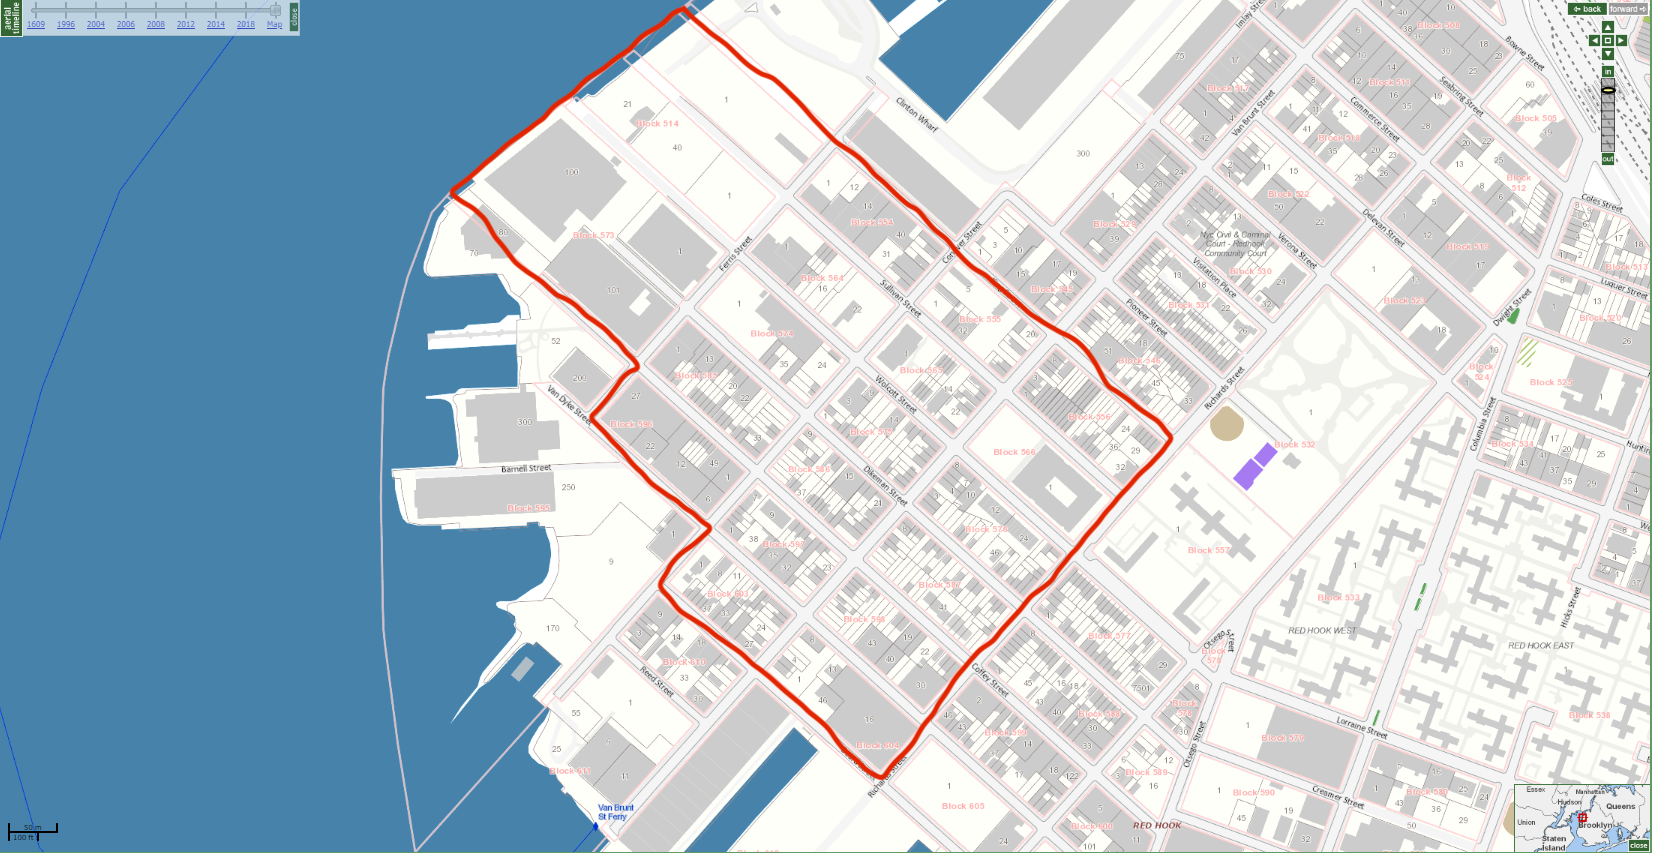

In [2]:
Image('Study_Area.png')

**This is our designated study area.**

In [16]:
bk_plutoshp = plutoshp[plutoshp.Borough=='BK']

In [17]:
bk_plutoshp.shape

(276532, 90)

In [21]:
redhook_plutoshp = bk_plutoshp[bk_plutoshp["ZipCode"] == 11231]

In [23]:
redhook_plutoshp.shape

(4750, 90)

In [31]:
studyarea_block = [514, 515, 554, 555, 556, 564, 565, 566, 573,574, 575, 576, 585, 586, 587, 596, 597, 598, 603, 604]

In [35]:
studyarea_shp = redhook_plutoshp[(redhook_plutoshp["Block"] == 554) | (redhook_plutoshp["Block"] == 555)
                |(redhook_plutoshp["Block"] == 556) |(redhook_plutoshp["Block"] == 564)
                |(redhook_plutoshp["Block"] == 565) |(redhook_plutoshp["Block"] == 566)
                |(redhook_plutoshp["Block"] == 574) |(redhook_plutoshp["Block"] == 575)
                |(redhook_plutoshp["Block"] == 576) |(redhook_plutoshp["Block"] == 585)
                |(redhook_plutoshp["Block"] == 586) |(redhook_plutoshp["Block"] == 587)
                |(redhook_plutoshp["Block"] == 596) |(redhook_plutoshp["Block"] == 597)
                |(redhook_plutoshp["Block"] == 598) | (redhook_plutoshp["Block"] == 603)
                |(redhook_plutoshp["Block"] == 604)|(redhook_plutoshp["Block"] == 573)
                |(redhook_plutoshp["Block"] == 514)|((redhook_plutoshp["Block"] == 515) & (redhook_plutoshp["Lot"] == 1))]

Read the filtered shpfile.

In [3]:
studyarea_shp = gpd.GeoDataFrame.from_file("redhook/redhook.shp")

In [4]:
studyarea_shp.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
0,BK,514,1,306,53,1006,15,38,11231,L101,76,38,4100,3,06,1D,44 FERRIS STREET,M2-1,None,None,None,None,None,None,None,None,None,N,G7,10,0,None,RED HOOK INDUSTRIAL C,50000,600,600,0,0,0,0,0,0,600,2,1,1.0,0,1,200.00,250.00,10.0,60.00,None,0,N,5,5,357480.0,380880.0,0.0,0.0,1931,0,0,None,None,0.01,0.0,2.0,0.0,3,3005140001,0,0053,979883,186919,16a,None,301 003,30205,None,3.005140e+09,03/26/2004,1,1,1,18v2.1,904.133407,50823.268000,"POLYGON ((979724.6891568005 186921.0865094811,..."
1,BK,514,21,306,53,1006,15,38,11231,L101,76,38,4100,3,06,1D,236 WOLCOTT STREET,M2-1,None,None,None,None,None,None,None,None,None,N,T1,07,0,X,PORT OF N Y AUTHORITY,47000,3294,3294,0,1050,0,0,0,0,2244,2,1,1.0,0,1,251.83,200.00,23.0,85.00,None,0,Y,5,0,469800.0,657450.0,469800.0,657450.0,1931,0,0,None,None,0.07,0.0,2.0,0.0,3,3005140021,0,0053,979512,187252,16a,None,301 003,30205,None,0.000000e+00,None,1,1,1,18v2.1,878.215687,41596.698115,(POLYGON ((979341.5711566359 187254.1544128954...
2,BK,514,40,306,53,1006,15,38,11231,L101,76,38,4100,3,06,1D,219 SULLIVAN STREET,M2-1,None,None,None,None,None,None,None,None,None,N,G7,10,0,None,RED HOOK INDUSTRIAL C,49740,0,0,0,0,0,0,0,0,0,7,0,0.0,0,0,125.00,100.00,0.0,0.00,None,0,N,5,5,369000.0,369000.0,0.0,0.0,0,0,0,None,None,0.00,0.0,2.0,0.0,3,3005140040,0,0053,979699,187085,16a,None,301 003,30205,None,3.005140e+09,03/26/2004,1,1,1,18v2.1,926.757323,53198.638098,"POLYGON ((979862.2505614758 187079.6997093111,..."
3,BK,515,1,306,53,1006,15,38,11231,L101,76,38,4100,3,06,1D,42 FERRIS STREET,M2-1,None,None,None,None,None,None,None,None,None,N,G7,10,0,X,GOVERNORS ISLAND CORP,141144,7672,7672,0,7672,0,0,0,0,0,2,1,1.0,0,1,200.00,701.67,25.0,35.00,None,0,Y,5,5,827376.0,1198626.0,827376.0,1198626.0,1980,0,0,None,None,0.05,0.0,2.0,0.0,3,3005150001,0,0053,979879,187259,16a,None,301 003,30205,None,0.000000e+00,None,1,1,1,18v2.1,1752.353536,136393.261528,"POLYGON ((980207.112732634 187100.2833295614, ..."
4,BK,554,1,306,53,1008,15,38,11231,L101,76,38,4100,3,06,1D,23 FERRIS STREET,M2-1,None,None,None,None,None,None,None,None,None,N,G1,10,0,None,"41 FERRIS, LLC",20000,5820,5820,0,0,0,5820,0,0,0,2,1,1.0,0,1,200.00,100.00,60.0,96.83,None,0,N,3,0,149850.0,929700.0,0.0,0.0,1931,0,0,None,None,0.29,0.0,2.0,0.0,3,3005540001,0,0053,980224,186962,16a,None,301 003,30206,None,0.000000e+00,None,1,1,1,18v2.1,605.316103,20280.353102,"POLYGON ((980329.5232489705 187004.2464481443,..."


(978797.776706174, 981509.0244332701, 184786.03359454422, 187682.61001924129)

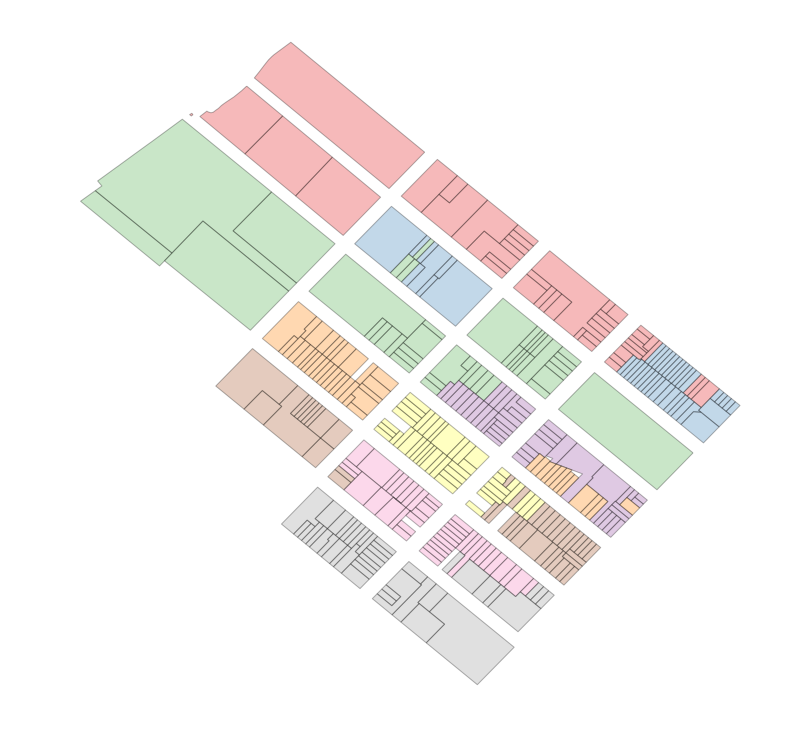

In [5]:
fig = pl.figure(figsize=(13,13)) 
ax = fig.add_subplot(111)
studyarea_shp.geometry.plot(alpha = 0.3, cmap = 'Set1', edgecolor='k', ax=ax)
ax.axis('off')

In [6]:
studyarea_shp[(studyarea_shp["Block"] == 515) & (studyarea_shp["Lot"] == 1)]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
3,BK,515,1,306,53,1006,15,38,11231,L101,76,38,4100,3,06,1D,42 FERRIS STREET,M2-1,None,None,None,None,None,None,None,None,None,N,G7,10,0,X,GOVERNORS ISLAND CORP,141144,7672,7672,0,7672,0,0,0,0,0,2,1,1.0,0,1,200.0,701.67,25.0,35.0,None,0,Y,5,5,827376.0,1198626.0,827376.0,1198626.0,1980,0,0,None,None,0.05,0.0,2.0,0.0,3,3005150001,0,0053,979879,187259,16a,None,301 003,30205,None,0.0,None,1,1,1,18v2.1,1752.353536,136393.261528,"POLYGON ((980207.112732634 187100.2833295614, ..."


In [7]:
studyarea_shp.shape

(378, 90)

In [8]:
studyarea_shp["BBL"].nunique()

378

In [9]:
studyarea_shp["BBL"] = studyarea_shp["BBL"].astype(str)

In [10]:
# studyarea_shp.to_file('redhook.shp')

In [11]:
studyarea_shp["ZoneDist1"].isna().sum()

0

In [12]:
studyarea_shp["ZoneDist2"].isna().sum()

375

In [13]:
studyarea_shp["ZoneDist3"].isna().sum()

378

In [14]:
studyarea_shp["ZoneDist4"].isna().sum()

378

In [15]:
pd.set_option('display.max_rows', 500)

In [16]:
studyarea_shp.isna().sum()

Borough         0
Block           0
Lot             0
CD              0
CT2010          0
CB2010          0
SchoolDist      0
Council         0
ZipCode         0
FireComp        0
PolicePrct      0
HealthCent      0
HealthArea      0
Sanitboro       0
SanitDistr      0
SanitSub        0
Address         0
ZoneDist1       0
ZoneDist2     375
ZoneDist3     378
ZoneDist4     378
Overlay1      287
Overlay2      378
SPDist1       341
SPDist2       378
SPDist3       378
LtdHeight     378
SplitZone       0
BldgClass       0
LandUse        15
Easements       0
OwnerType     367
OwnerName      11
LotArea         0
BldgArea        0
ComArea         0
ResArea         0
OfficeArea      0
RetailArea      0
GarageArea      0
StrgeArea       0
FactryArea      0
OtherArea       0
AreaSource      0
NumBldgs        0
NumFloors       0
UnitsRes        0
UnitsTotal      0
LotFront        0
LotDepth        0
BldgFront       0
BldgDepth       0
Ext           358
ProxCode        0
IrrLotCode      0
LotType   

### Drop the columns which full of N/A

In [17]:
studyarea_shp.drop(columns = {"ZoneDist3","ZoneDist4","Overlay2","SPDist2","SPDist3","LtdHeight","HistDist","ZMCode"},
                  axis=1, inplace=True)

In [18]:
studyarea_shp.shape

(378, 82)

In [19]:
studyarea_shp.columns.values

array([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthCent', u'HealthArea', u'Sanitboro', u'SanitDistr',
       u'SanitSub', u'Address', u'ZoneDist1', u'ZoneDist2', u'Overlay1',
       u'SPDist1', u'SplitZone', u'BldgClass', u'LandUse', u'Easements',
       u'OwnerType', u'OwnerName', u'LotArea', u'BldgArea', u'ComArea',
       u'ResArea', u'OfficeArea', u'RetailArea', u'GarageArea',
       u'StrgeArea', u'FactryArea', u'OtherArea', u'AreaSource',
       u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront',
       u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext', u'ProxCode',
       u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand',
       u'AssessTot', u'ExemptLand', u'ExemptTot', u'YearBuilt',
       u'YearAlter1', u'YearAlter2', u'Landmark', u'BuiltFAR',
       u'ResidFAR', u'CommFAR', u'FacilFAR', u'BoroCode', u'BBL',
       u'CondoNo', u'Tract2010', u'XCoord', u'YC

### Choose the features we interested in, store it in different dataframe

## Final_Dataset

In [50]:
studyarea = studyarea_shp[["BBL","Block","Lot","ZoneDist1","LandUse","BldgArea","ComArea","ResArea","OfficeArea","RetailArea","GarageArea",
                          "StrgeArea","FactryArea","OtherArea","NumBldgs","NumFloors","UnitsRes","UnitsTotal",
                          "BldgDepth","BuiltFAR","ResidFAR","CommFAR","FacilFAR","geometry"]]

In [51]:
studyarea = studyarea.reset_index(drop = True)

In [52]:
studyarea.head()

,BBL,Block,Lot,ZoneDist1,LandUse,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR,geometry
0,3005140001,514,1,M2-1,10,600,600,0,0,0,0,0,0,600,1,1.0,0,1,60.00,0.01,0.0,2.0,0.0,"POLYGON ((979724.6891568005 186921.0865094811,..."
1,3005140021,514,21,M2-1,07,3294,3294,0,1050,0,0,0,0,2244,1,1.0,0,1,85.00,0.07,0.0,2.0,0.0,(POLYGON ((979341.5711566359 187254.1544128954...
2,3005140040,514,40,M2-1,10,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.00,0.0,2.0,0.0,"POLYGON ((979862.2505614758 187079.6997093111,..."
3,3005150001,515,1,M2-1,10,7672,7672,0,7672,0,0,0,0,0,1,1.0,0,1,35.00,0.05,0.0,2.0,0.0,"POLYGON ((980207.112732634 187100.2833295614, ..."
4,3005540001,554,1,M2-1,10,5820,5820,0,0,0,5820,0,0,0,1,1.0,0,1,96.83,0.29,0.0,2.0,0.0,"POLYGON ((980329.5232489705 187004.2464481443,..."


## Dictionary

### ZoneDist1
- The zoning district classification of the tax lot.
- Under the Zoning Resolution, the map of New York City is generally apportioned into three basic zoning district categories: Residence (R), Commercial (C) and Manufacturing (M), which are further divided into a range of individual zoning districts, denoted by different number and letter combinations. In general, the higher the number immediately following the first letter (R, C or M), the higher the density or intensity of land use permitted.
- If the tax lot is divided by a zoning boundary line, ZONING DISTRICT 1 represents the zoning district classification occupying the greatest percentage of the tax lot’s area. Only zoning districts that cover at least 10% of a tax lot’s area are included.
- R1-1 - R10H: Residential Districts
- C1-6 - C8-4: Commercial Districts
- M1-1 – M3-2: Manufacturing Districts
- M1-1/R5 – M1-6/R10: Mixed Manufacturing & Residential Districts
- BPC: Battery Park City
- PARK: Areas designated as PARK, BALL FIELD, PLAYGROUND and PUBLIC SPACE in NYC Zoning Districts

### Land Use
- 01: One & Two Family Buildings
- 02: Multi-Family Walk-Up Buildings
- 03: Multi-Family Elevator Buildings
- 04: Mixed Residential & Commercial Buildings
- 05: Commercial & Office Buildings
- 06: Industrial & Manufacturing
- 07: Transportation & Utility
- 08: Public Facilities & Institutions
- 09: Open Space & Outdoor Recreation
- 10: Parking Facilities
- 11: Vacant Land

**Should I drop 'None' in Land Use?**

Convert None to 12 in the following steps.

### BldgArea
- Total building floor area: The total gross area in square feet, except for condominium measurements which come from the Condo Declaration and are net square footage not gross.
- A TOTAL BUILDING FLOOR AREA of zero can mean it is either not available or not applicable. If NUMBER OF BUILDINGS is greater than zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not available. If NUMBER OF BUILDINGS is zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not applicable.

### CommArea
- Commercial floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for commercial use.
- A COMMERCIAL FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA

### ResArea
- Residential floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.
- A RESIDENTIAL FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### OfficeArea
- Office floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.
- This information is NOT available for one, two or three family structures.
- An OFFICE FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### RetailArea
- Retail floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.
- A RETAIL FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### GarageArea
- Garage floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for garage use.
- A GARAGE FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### StrgeArea
- Storage floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for storage or loft purposes.
- A STORAGE FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### FactryArea
- Factory floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for factory, warehouse or loft use.
- A FACTORY FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### OtherArea
- Other floor area: An estimate of the exterior dimensions of the portion of the structure(s) allocated for other than commercial, residential, office, retail, garage, storage, or factory use.
- An OTHER FLOOR AREA of zero can mean it is either not available or not applicable.
- The sum of the various floor area fields does not always equal TOTAL BUILDING FLOOR AREA.

### NumBldgs
- Number of buildings: The number of buildings on the tax lot.

### NumFloors
- Number of floors: The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.
- Above ground basements are not included in the NUMBER OF FLOORS.
- A roof used for parking, farming, playground, etc. is not included in NUMBER OF FLOORS.
- If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, then NUMBER OF FLOORS is not available for the tax lot.
- If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS is not applicable for the tax lot.

### UnitsRes
- The sum of residential units in all buildings on the tax lot.
- If there are no residential units in the tax lot, this field will be zero.
- Hotels/motels, nursing homes and SROs do not have residential units, but boarding houses do. Basement units for building superintendents are counted as a residential unit.

### UnitsTotal
- Total units: The sum of residential and non-residential (offices, retail stores, etc.) units for all buildings on the tax lot.
- The count of non-residential units is sometimes not available if the building contains residential units.

### BldgDepth
- Building depth: The building’s depth, which is the effective perpendicular distance, measured in feet.


### BuiltFAR
- Built floor area ratios: The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.

### ResidFAR
- Maximum allowable residential FAR

### CommFAR
- Maximum allowable commercial FAR

### FacilFAR
- Maximum allowable community facility FAR

## Data_Explore

In [53]:
studyarea.head()

,BBL,Block,Lot,ZoneDist1,LandUse,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR,geometry
0,3005140001,514,1,M2-1,10,600,600,0,0,0,0,0,0,600,1,1.0,0,1,60.00,0.01,0.0,2.0,0.0,"POLYGON ((979724.6891568005 186921.0865094811,..."
1,3005140021,514,21,M2-1,07,3294,3294,0,1050,0,0,0,0,2244,1,1.0,0,1,85.00,0.07,0.0,2.0,0.0,(POLYGON ((979341.5711566359 187254.1544128954...
2,3005140040,514,40,M2-1,10,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.00,0.0,2.0,0.0,"POLYGON ((979862.2505614758 187079.6997093111,..."
3,3005150001,515,1,M2-1,10,7672,7672,0,7672,0,0,0,0,0,1,1.0,0,1,35.00,0.05,0.0,2.0,0.0,"POLYGON ((980207.112732634 187100.2833295614, ..."
4,3005540001,554,1,M2-1,10,5820,5820,0,0,0,5820,0,0,0,1,1.0,0,1,96.83,0.29,0.0,2.0,0.0,"POLYGON ((980329.5232489705 187004.2464481443,..."


In [54]:
set(studyarea['LandUse'])

{None, u'01', u'02', u'03', u'04', u'05', u'06', u'07', u'08', u'10', u'11'}

In [55]:
sum(studyarea['LandUse'].isna())

15

convert Na to u'12'

In [56]:
studyarea['LandUse'].fillna(u'12', inplace = True)

In [57]:
set(studyarea['LandUse'])

{u'01', u'02', u'03', u'04', u'05', u'06', u'07', u'08', u'10', u'11', u'12'}

In [58]:
sum(studyarea['LandUse'].isna())

0

In [59]:
LandUseCount = studyarea.groupby(['LandUse']).size().to_frame().rename(columns = {0: 'LandUseCount'})

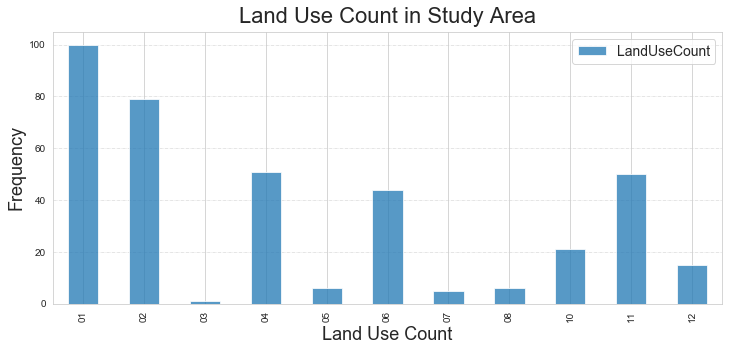

In [60]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

LandUseCount.plot.bar(label='Land Use Count', alpha=0.75, ax=ax)

ax.set_title("Land Use Count in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Land Use Count", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

Square-foot (SF) built per land use and FAR per land use

In [61]:
studyarea.head()

,BBL,Block,Lot,ZoneDist1,LandUse,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR,geometry
0,3005140001,514,1,M2-1,10,600,600,0,0,0,0,0,0,600,1,1.0,0,1,60.00,0.01,0.0,2.0,0.0,"POLYGON ((979724.6891568005 186921.0865094811,..."
1,3005140021,514,21,M2-1,07,3294,3294,0,1050,0,0,0,0,2244,1,1.0,0,1,85.00,0.07,0.0,2.0,0.0,(POLYGON ((979341.5711566359 187254.1544128954...
2,3005140040,514,40,M2-1,10,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.00,0.0,2.0,0.0,"POLYGON ((979862.2505614758 187079.6997093111,..."
3,3005150001,515,1,M2-1,10,7672,7672,0,7672,0,0,0,0,0,1,1.0,0,1,35.00,0.05,0.0,2.0,0.0,"POLYGON ((980207.112732634 187100.2833295614, ..."
4,3005540001,554,1,M2-1,10,5820,5820,0,0,0,5820,0,0,0,1,1.0,0,1,96.83,0.29,0.0,2.0,0.0,"POLYGON ((980329.5232489705 187004.2464481443,..."


In [62]:
sumList = {'BldgArea': 'sumBldgArea', 'ComArea': 'sumComArea', 'ResArea': 'sumResArea', 'OfficeArea': 'sumOfficeArea', 
           'RetailArea': 'sumRetailArea', 'GarageArea': 'sumGarageArea', 'StrgeArea': 'sumStrgeArea', 'FactryArea': 'sumFactryArea', 
           'OtherArea': 'sumOtherArea', 'BuiltFAR': 'sumBuiltFAR', 'ResidFAR': 'sumResidFAR', 'CommFAR': 'sumCommFAR', 'FacilFAR': 'sumFacilFAR'}

studyareaSum = studyarea.groupby('LandUse').sum()[['BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 
                                                   'OtherArea', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR']].rename(columns = sumList)

In [63]:
meanList = {'BldgArea': 'meanBldgArea', 'ComArea': 'meanComArea', 'ResArea': 'meanResArea', 'OfficeArea': 'meanOfficeArea', 
           'RetailArea': 'meanRetailArea', 'GarageArea': 'meanGarageArea', 'StrgeArea': 'meanStrgeArea', 'FactryArea': 'meanFactryArea', 
           'OtherArea': 'meanOtherArea', 'BuiltFAR': 'meanBuiltFAR', 'ResidFAR': 'meanResidFAR', 'CommFAR': 'meanCommFAR', 'FacilFAR': 'meanFacilFAR'}

studyareaMean = studyarea.groupby('LandUse').mean()[['BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 
                                                     'OtherArea', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR']].rename(columns = meanList)

In [64]:
studyareaCount = studyarea.groupby('LandUse').count()[['BldgArea']].rename(columns = {'BldgArea': 'Counts'})

In [65]:
Landuse = pd.concat([studyareaCount, studyareaSum, studyareaMean], axis = 1)

In [66]:
Landuse

,Counts,sumBldgArea,sumComArea,sumResArea,sumOfficeArea,sumRetailArea,sumGarageArea,sumStrgeArea,sumFactryArea,sumOtherArea,sumBuiltFAR,sumResidFAR,sumCommFAR,sumFacilFAR,meanBldgArea,meanComArea,meanResArea,meanOfficeArea,meanRetailArea,meanGarageArea,meanStrgeArea,meanFactryArea,meanOtherArea,meanBuiltFAR,meanResidFAR,meanCommFAR,meanFacilFAR
LandUse,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,100,192341,0,177687,0,0,0,0,0,0,107.79,95.00,38.0,200.0,1923.410000,0.000000,1776.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.077900,0.950000,0.380000,2.000000
02,79,371161,1199,366086,0,1199,0,0,0,0,123.51,81.11,29.0,162.8,4698.240506,15.177215,4634.000000,0.000000,15.177215,0.000000,0.000000,0.000000,0.000000,1.563418,1.026709,0.367089,2.060759
03,1,44400,2000,42400,1000,0,0,0,0,1000,1.29,1.25,0.0,2.0,44400.000000,2000.000000,42400.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.290000,1.250000,0.000000,2.000000
04,51,226854,85596,141258,17414,53558,4943,1972,0,3596,104.37,57.50,17.0,99.2,4448.117647,1678.352941,2769.764706,341.450980,1050.156863,96.921569,38.666667,0.000000,70.509804,2.046471,1.127451,0.333333,1.945098
05,6,30960,30960,0,12700,2200,3000,3600,0,9460,11.38,1.25,8.0,21.2,5160.000000,5160.000000,0.000000,2116.666667,366.666667,500.000000,600.000000,0.000000,1576.666667,1.896667,0.208333,1.333333,3.533333
06,44,818601,816401,2200,44290,475,0,182995,588641,0,51.97,17.50,48.0,78.4,18604.568182,18554.568182,50.000000,1006.590909,10.795455,0.000000,4158.977273,13378.204545,0.000000,1.181136,0.397727,1.090909,1.781818
07,5,33424,33424,0,1050,0,28130,2000,0,2244,3.42,1.25,7.0,4.4,6684.800000,6684.800000,0.000000,210.000000,0.000000,5626.000000,400.000000,0.000000,448.800000,0.684000,0.250000,1.400000,0.880000
08,6,130909,130909,0,86862,0,0,0,9100,34947,7.39,5.00,2.0,12.8,21818.166667,21818.166667,0.000000,14477.000000,0.000000,0.000000,0.000000,1516.666667,5824.500000,1.231667,0.833333,0.333333,2.133333
10,21,86717,84717,0,9247,0,69070,5000,0,1400,8.64,6.25,30.0,14.8,4129.380952,4034.142857,0.000000,440.333333,0.000000,3289.047619,238.095238,0.000000,66.666667,0.411429,0.297619,1.428571,0.704762


FAR hist explore --- BuiltFAR

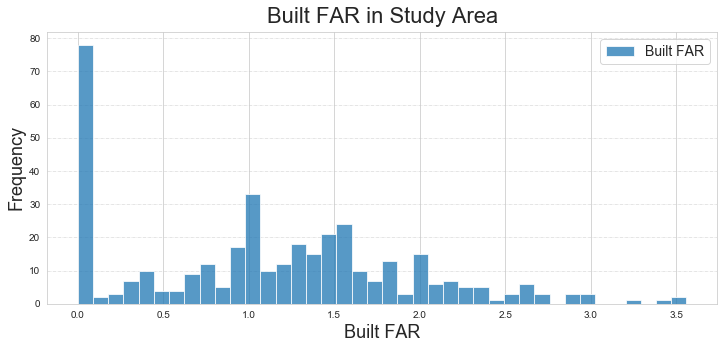

In [67]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['BuiltFAR'].plot(kind="hist", bins=40, label='Built FAR', alpha=0.75)

ax.set_title("Built FAR in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Built FAR", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

Square-foot (SF) built hist explore

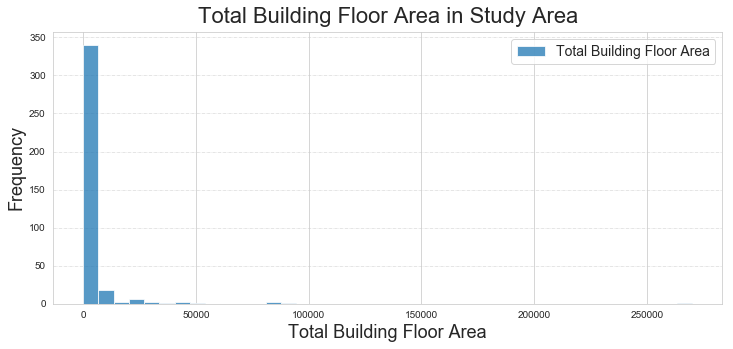

In [68]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['BldgArea'].plot(kind="hist", bins=40, label='Total Building Floor Area', alpha=0.75)

ax.set_title("Total Building Floor Area in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Total Building Floor Area", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

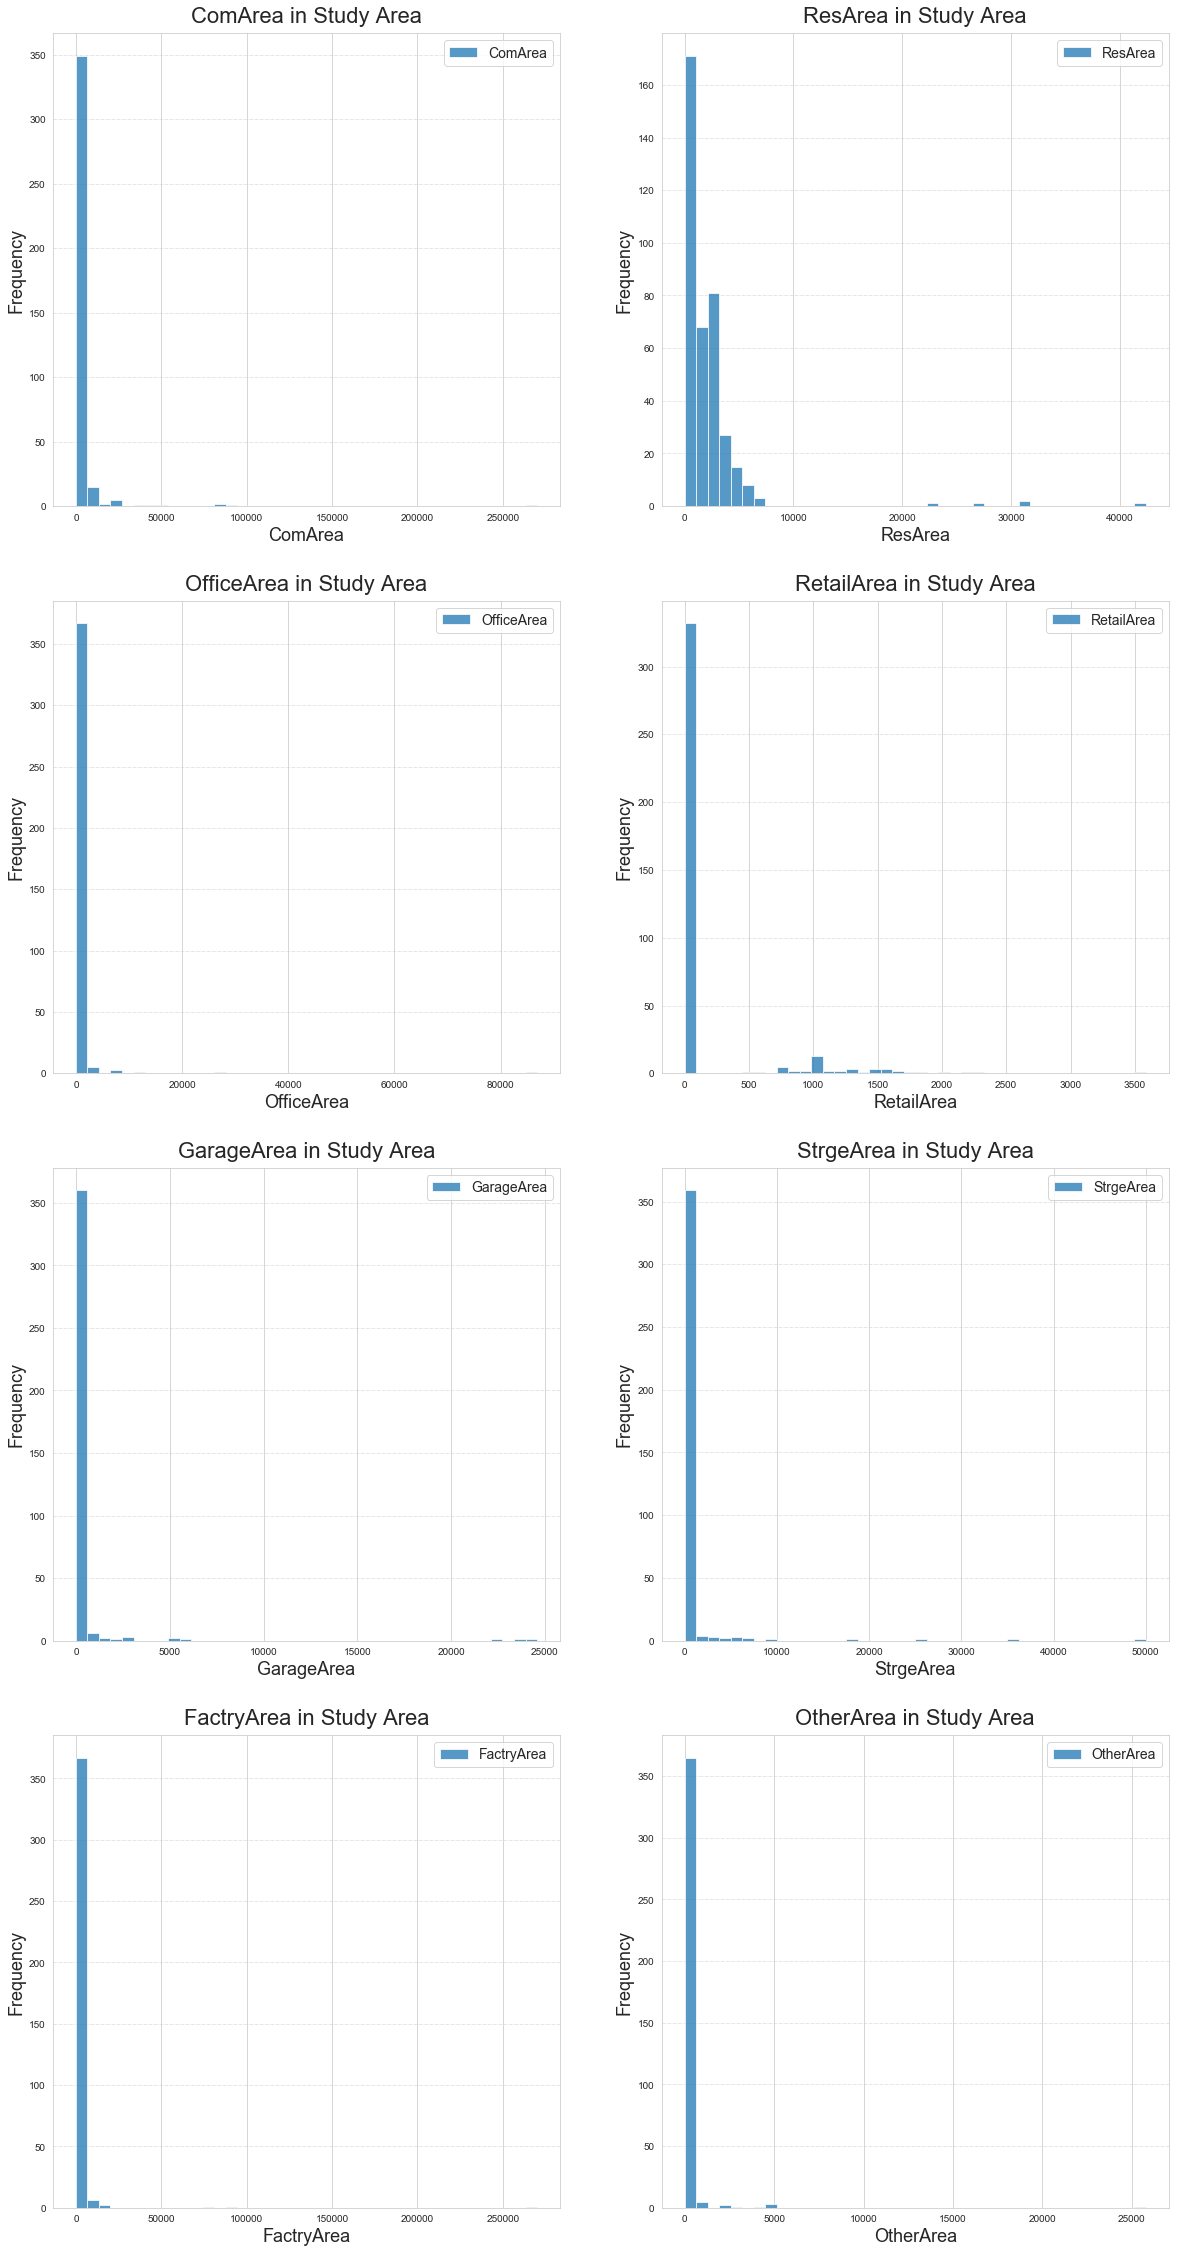

In [69]:
AreaList = ['ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea']

fig = pl.figure(figsize = (20,40))

for i in range(0, len(AreaList)):
    
    ax = fig.add_subplot(4,2,i+1)

    studyarea[AreaList[i]].plot(kind="hist", bins=40, label=AreaList[i], alpha=0.75)
    
    title_str = AreaList[i] + ' in Study Area'

    ax.set_title(title_str, fontsize=22, y=1.01)
    ax.set_xlabel(AreaList[i], fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    pl.grid(linewidth=0.5, axis='y', linestyle='-.')
    pl.legend(fontsize=14)

pl.show()

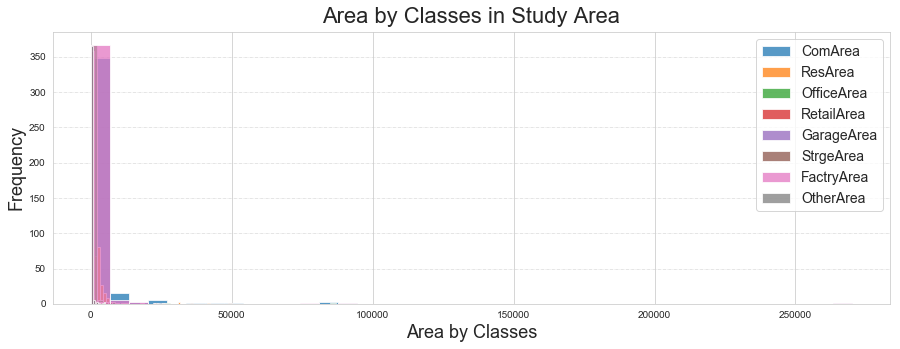

In [70]:
AreaList = ['ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea']

fig = pl.figure(figsize = (15,5))
ax = fig.add_subplot(111)

for i in range(0, len(AreaList)):
    studyarea[AreaList[i]].plot(kind="hist", bins=40, label=AreaList[i], alpha=0.75)

    ax.set_title("Area by Classes in Study Area", fontsize=22, y=1.01)
    ax.set_xlabel("Area by Classes", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)

pl.show()


NumBldgs hist

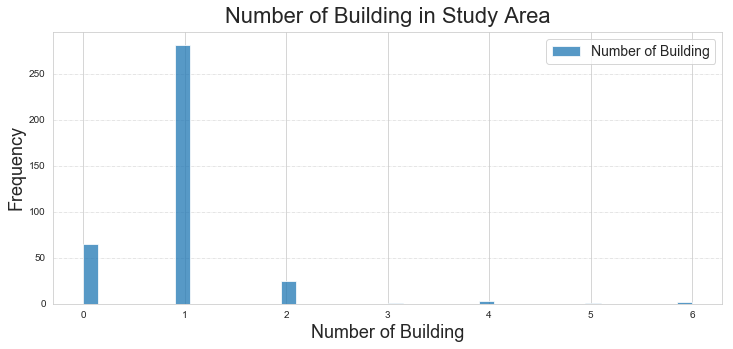

In [71]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['NumBldgs'].plot(kind="hist", bins=40, label='Number of Building', alpha=0.75)

ax.set_title("Number of Building in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Number of Building", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

NumFloors hist

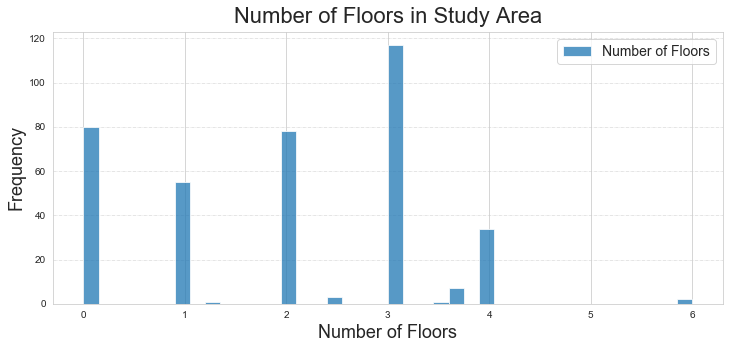

In [72]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['NumFloors'].plot(kind="hist", bins=40, label='Number of Floors', alpha=0.75)

ax.set_title("Number of Floors in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Number of Floors", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

UnitsRes hist

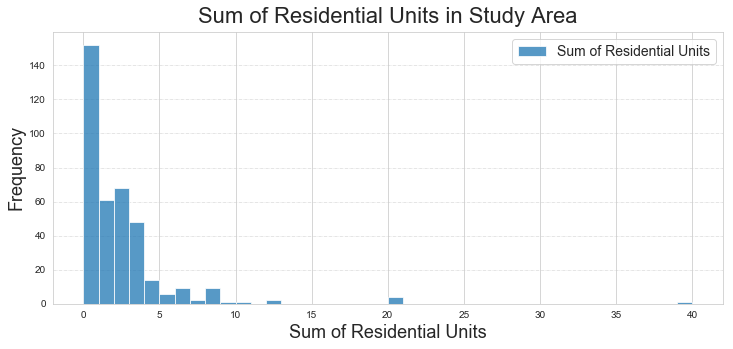

In [73]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['UnitsRes'].plot(kind="hist", bins=40, label='Sum of Residential Units', alpha=0.75)

ax.set_title("Sum of Residential Units in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Sum of Residential Units", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

UnitsTotal hist

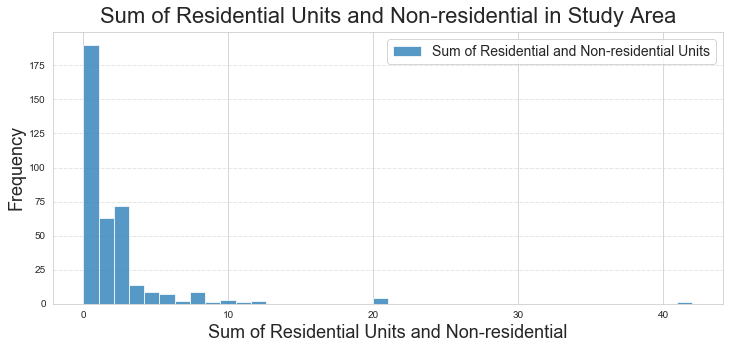

In [74]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['UnitsTotal'].plot(kind="hist", bins=40, label='Sum of Residential and Non-residential Units', alpha=0.75)

ax.set_title("Sum of Residential Units and Non-residential in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Sum of Residential Units and Non-residential", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

BldgDepth hist

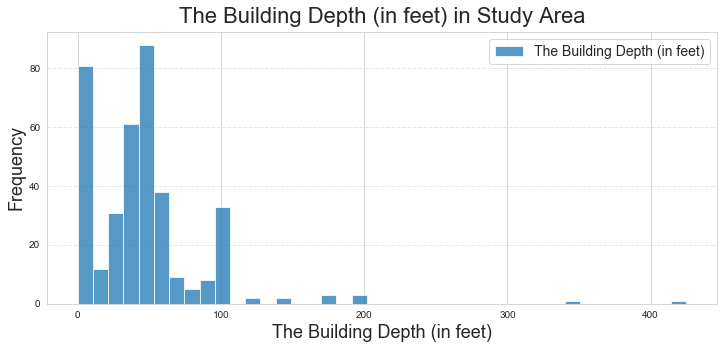

In [75]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

studyarea['BldgDepth'].plot(kind="hist", bins=40, label='The Building Depth (in feet)', alpha=0.75)

ax.set_title("The Building Depth (in feet) in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("The Building Depth (in feet)", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

ZoneDist1

In [76]:
set(studyarea['ZoneDist1'])

{u'M1-1', u'M1-1/R5', u'M1-2', u'M2-1', u'R5', u'R6'}

In [77]:
ZoneDistCount = studyarea.groupby(['ZoneDist1']).size().to_frame().rename(columns = {0: 'ZoneDistCount'})

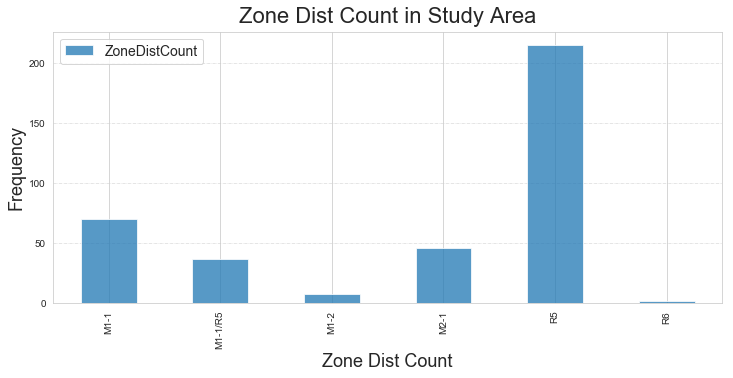

In [78]:
fig = pl.figure(figsize = (12,5))
ax = fig.add_subplot(111)

ZoneDistCount.plot.bar(label='Zone Dist Count', alpha=0.75, ax=ax)

ax.set_title("Zone Dist Count in Study Area", fontsize=22, y=1.01)
ax.set_xlabel("Zone Dist Count", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18)


pl.grid(linewidth=0.5, axis='y', linestyle='-.')
pl.legend(fontsize=14)
pl.show()

## Spatial_Analyse

C:\Users\sherr\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


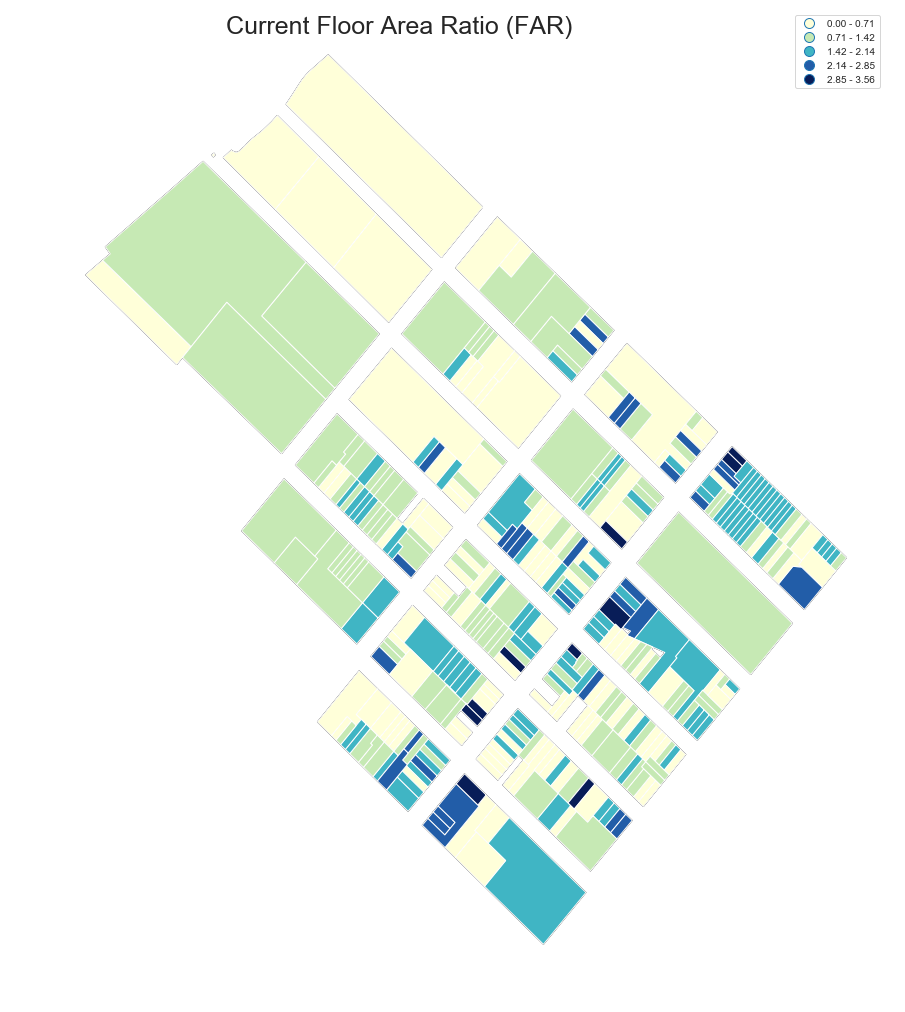

In [79]:
fig = pl.figure(figsize=(15,18))
sns.set_style("whitegrid")

ax = fig.add_subplot(111)
studyarea.plot(facecolor="k", edgecolor="k",ax=ax)
studyarea.plot(ax=ax, column="BuiltFAR", cmap='YlGnBu', scheme='Equal_Interval', label='FAR',legend = True)
plt.title('Current Floor Area Ratio (FAR)', size=25, y=.97, x=0.42)
# vmin, vmax = 0.0, 4.0
# cax = fig.add_axes()
# sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = []
# fig.colorbar(sm, cax=cax, orientation='vertical')
# plt.legend(fontsize=14)
ax.axis('off')
plt.show()

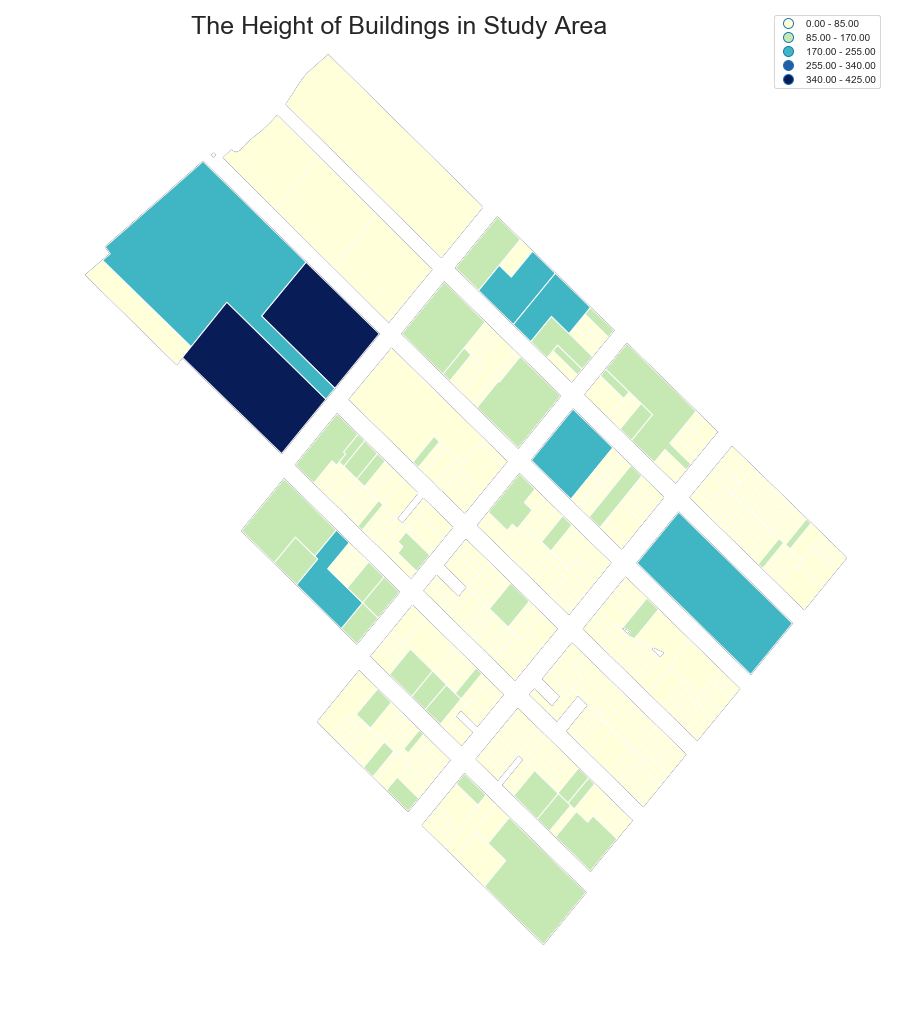

In [80]:
fig = pl.figure(figsize=(15,18))
sns.set_style("whitegrid")

ax = fig.add_subplot(111)
studyarea.plot(facecolor="k", edgecolor="k",ax=ax)
studyarea.plot(ax=ax, column="BldgDepth", cmap='YlGnBu', scheme='Equal_Interval', label='FAR',legend = True)
plt.title('The Height of Buildings in Study Area', size=25, y=.97, x=0.42)
# cax = fig.add_axes()
ax.axis('off')
plt.show()

In [81]:
studyarea['LandUse'].fillna(u'12', inplace = True)

In [82]:
studyarea["LandUse"] = studyarea["LandUse"].astype(str)

In [83]:
type(studyarea["LandUse"].iloc[2])

str

In [84]:
studyarea['LandUse_c'] = studyarea["LandUse"]

In [85]:
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("01", "One &Two Family Buildings")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("02", "Multi-Family Walk-Up Buildings")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("03", "Multi-Family Elevator Buildings")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("04", "Mixed Residential & Commercial Buildings")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("05", "Commercial & Office Buildings")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("06", "Industrial & Manufacturing")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("07", "Transportation & Utility")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("08", "Public Facilities & Institutions")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("09", "Open Space & Outdoor Recreation")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("10", "Parking Facilities")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("11", "Vacant Land")
studyarea['LandUse_c'] = studyarea['LandUse_c'].replace("12", "N/A")

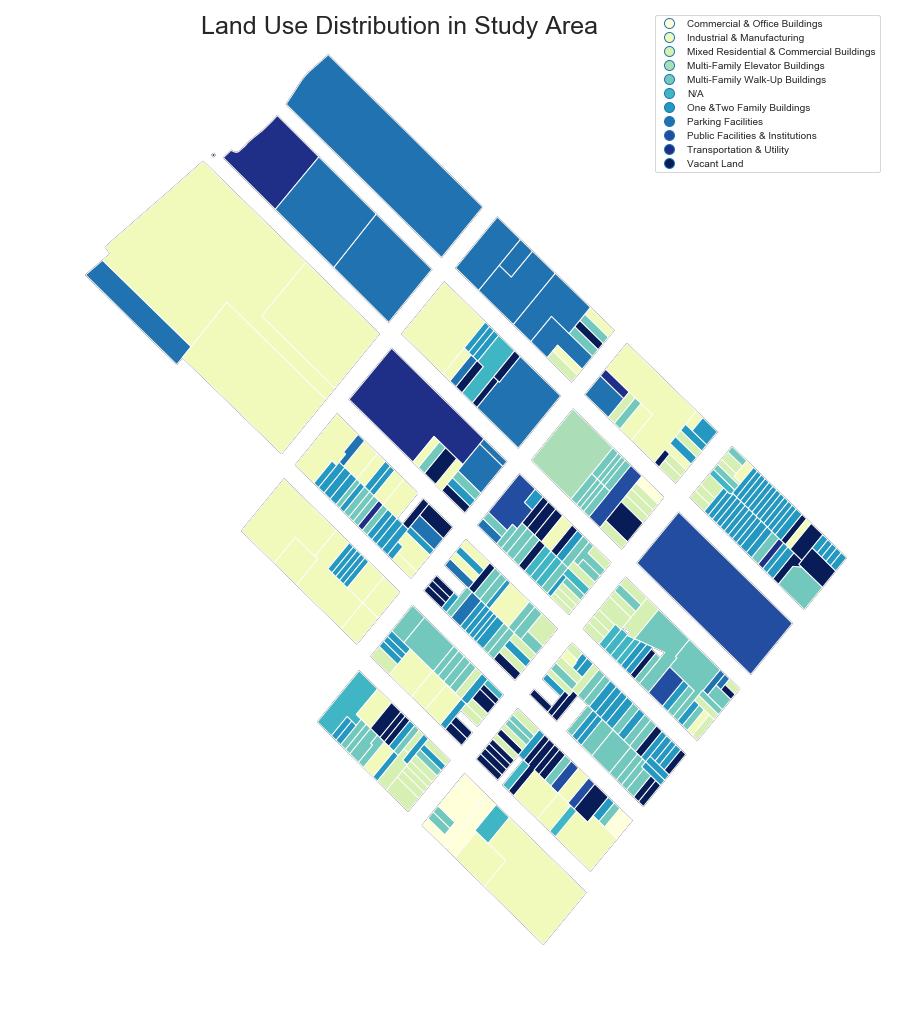

In [86]:
fig = pl.figure(figsize=(15,18))
sns.set_style("whitegrid")

ax = fig.add_subplot(111)
studyarea.plot(facecolor="k", edgecolor="k",ax=ax)
studyarea.plot(ax=ax, column="LandUse_c", cmap='YlGnBu', legend = True, categorical=True)
pl.title('Land Use Distribution in Study Area', size=25, y=.97, x=0.42)
# cax = fig.add_axes()
# cax.set_label(["One & Two Family Buildings",'2','3','4','5','6','7','8','9','10','11'])
# ax.legend()
# L.get_texts()[0].set_text('make it short')
ax.axis('off')
plt.show()

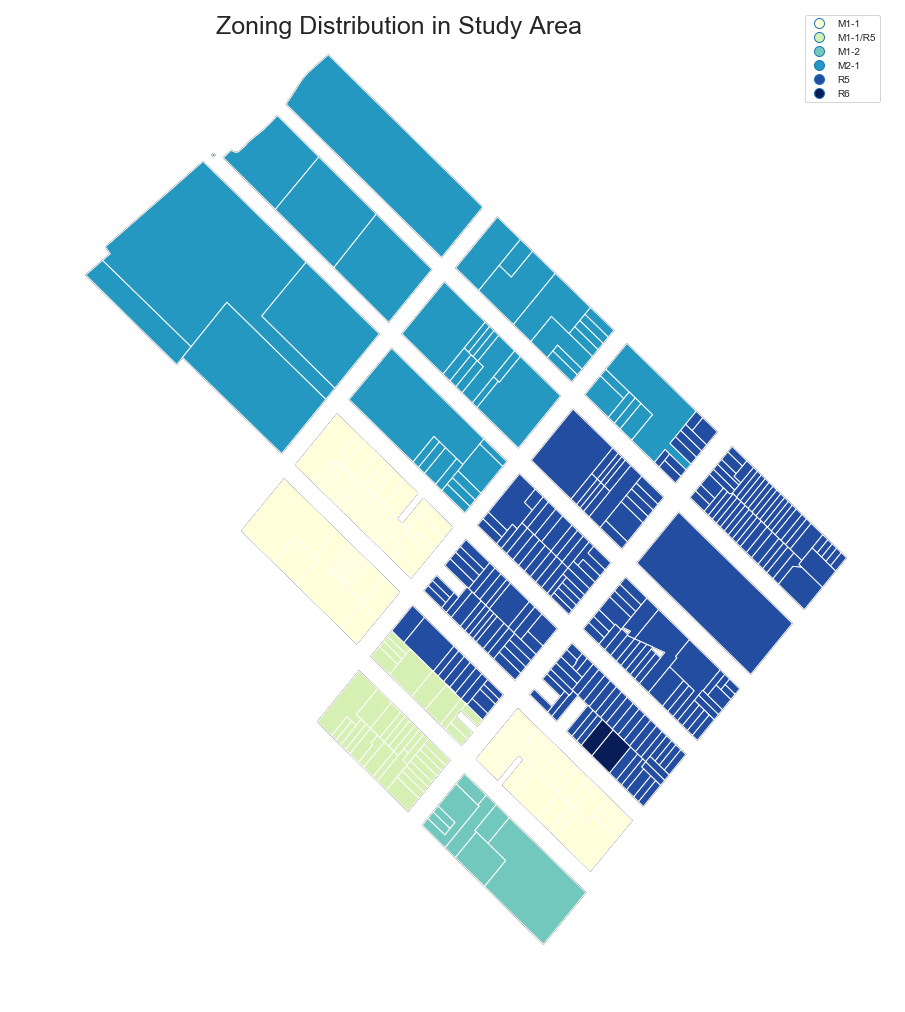

In [87]:
fig = pl.figure(figsize=(15,18))
sns.set_style("whitegrid")

ax = fig.add_subplot(111)
studyarea.plot(facecolor="k", edgecolor="k",ax=ax)
studyarea.plot(ax=ax, column="ZoneDist1", cmap='YlGnBu', legend = True, categorical=True)
pl.title('Zoning Distribution in Study Area', size=25, y=.97, x=0.42)
# cax = fig.add_axes()
# cax.set_label(["One & Two Family Buildings",'2','3','4','5','6','7','8','9','10','11'])
# ax.legend()
# L.get_texts()[0].set_text('make it short')
ax.axis('off')
plt.show()

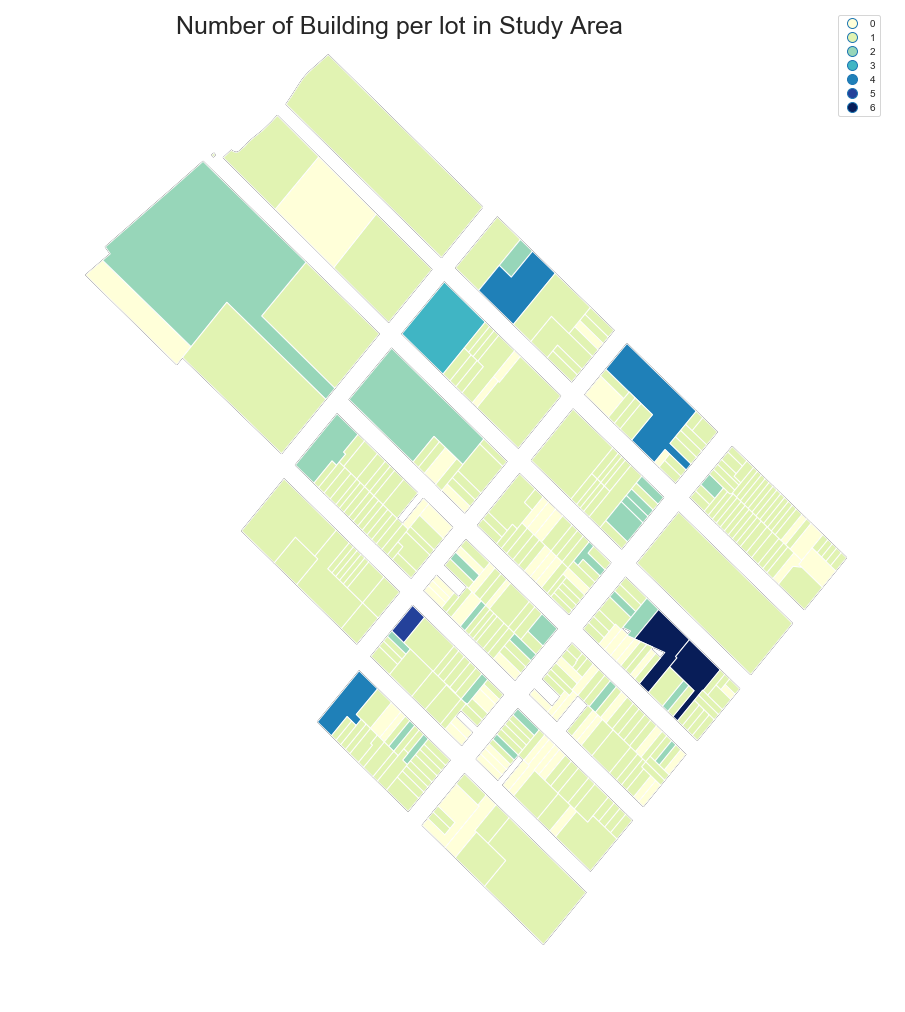

In [88]:
fig = pl.figure(figsize=(15,18))
sns.set_style("whitegrid")

ax = fig.add_subplot(111)
studyarea.plot(facecolor="k", edgecolor="k",ax=ax)
studyarea.plot(ax=ax, column="NumBldgs", cmap='YlGnBu', legend = True, categorical=True)
pl.title('Number of Building per lot in Study Area', size=25, y=.97, x=0.42)
# cax = fig.add_axes()
# cax.set_label(["One & Two Family Buildings",'2','3','4','5','6','7','8','9','10','11'])
# ax.legend()
# L.get_texts()[0].set_text('make it short')
ax.axis('off')
plt.show()